# Import Librairies:   

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Import dataset:

In [2]:
directory = r"C:\Users\user\Desktop\projet python\House Prediction Kaggle"
list_of_files = os.listdir(directory) #get file names from directory

df = pd.read_csv(directory + '/' + list_of_files[3])
df_test = pd.read_csv(directory + '/' + list_of_files[2])
submmission = pd.read_csv(directory + '/' + list_of_files[1])

df.shape

(1460, 81)

# EDA:

## Preliminaries:

In [3]:
features_name = df.columns 
features_name , len(features_name)

test_null = []
#for x in df_test.columns:             #Removing the null columns from the test dataset
    #if df_test[x].isnull().sum() > 0 :
#        df_test = df_test.drop(x , axis = 1)
#       test_null.append(x)
test_null

[]

## Multicollinearity:

Text(0.5, 1.0, 'Multicollinearity Plot.')

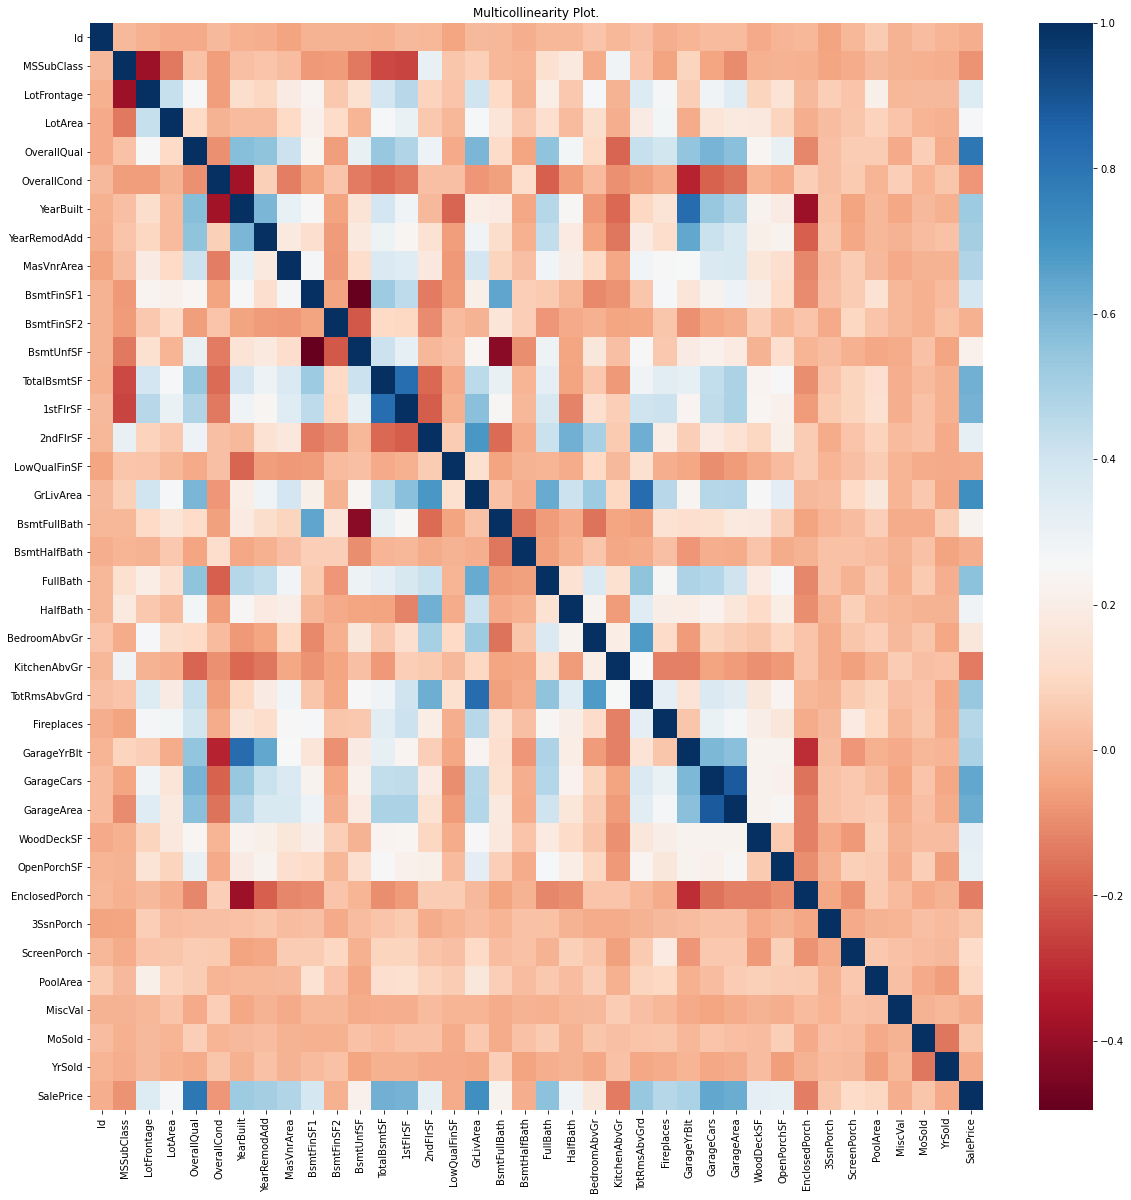

In [4]:
corr = df.corr()
plt.subplots(figsize = (20 , 20))
cmap = sns.heatmap(corr , cmap = 'RdBu') 
plt.title("Multicollinearity Plot.")

In [5]:
#Look for depandant features:
rows , columns = corr.shape
corr_features_detected_2d = []   #The depandant variables list
corr_features = corr.columns           #All the corr() features (excluding the NA // Null values)

for x in corr_features:
    
    for i in corr_features:
        if (corr[x][i] > 0.8 and i!=x and [i , x] not in corr_features_detected_2d):
            corr_features_detected_2d.append([x , i])  #Does not contain the corr with 'SalaryPrice'
corr_features_detected_1d = []
for x in corr_features_detected_2d:
    
    if x[0] not in corr_features_detected_1d:
        corr_features_detected_1d.append(x[0])
    
    if x[1] not in corr_features_detected_1d:
        corr_features_detected_1d.append(x[1])
        
df = df.drop(columns = corr_features_detected_1d)
df_test = df_test.drop(columns = corr_features_detected_1d)

## NA Values:

In [6]:
rows , columns = df.shape
temp_na_value = []
for x in df.columns:
    y = df[x].isnull().sum()
    if y>0:
        temp_na_value.append([round(y * 100 / rows , 3) , x]) #percentage of na values by column
        
from operator import itemgetter
temp_na_value = sorted(temp_na_value, key=itemgetter(0), reverse=True) #sorting the 2d list ::temp_na_value::

for x in temp_na_value:
    print (x[0] ,'% of' , x[1] ,'valuesare Na values.')
temp_na_value

99.521 % of PoolQC valuesare Na values.
96.301 % of MiscFeature valuesare Na values.
93.767 % of Alley valuesare Na values.
80.753 % of Fence valuesare Na values.
47.26 % of FireplaceQu valuesare Na values.
17.74 % of LotFrontage valuesare Na values.
5.548 % of GarageType valuesare Na values.
5.548 % of GarageFinish valuesare Na values.
5.548 % of GarageQual valuesare Na values.
5.548 % of GarageCond valuesare Na values.
2.603 % of BsmtExposure valuesare Na values.
2.603 % of BsmtFinType2 valuesare Na values.
2.534 % of BsmtQual valuesare Na values.
2.534 % of BsmtCond valuesare Na values.
2.534 % of BsmtFinType1 valuesare Na values.
0.548 % of MasVnrType valuesare Na values.
0.548 % of MasVnrArea valuesare Na values.
0.068 % of Electrical valuesare Na values.


[[99.521, 'PoolQC'],
 [96.301, 'MiscFeature'],
 [93.767, 'Alley'],
 [80.753, 'Fence'],
 [47.26, 'FireplaceQu'],
 [17.74, 'LotFrontage'],
 [5.548, 'GarageType'],
 [5.548, 'GarageFinish'],
 [5.548, 'GarageQual'],
 [5.548, 'GarageCond'],
 [2.603, 'BsmtExposure'],
 [2.603, 'BsmtFinType2'],
 [2.534, 'BsmtQual'],
 [2.534, 'BsmtCond'],
 [2.534, 'BsmtFinType1'],
 [0.548, 'MasVnrType'],
 [0.548, 'MasVnrArea'],
 [0.068, 'Electrical']]

## Fix na_values:

We can Drop the first 5 features since all of there values are NA.
For the rest we gonna fill them with the mean of each of them after label encoding the string columns.

In [7]:
temp = []
for y in temp_na_value:
    temp.append(y[1])
if temp[0] in df.columns:
    df = df.drop(temp [:5] , axis = 1) #dropping the 5 five columns for the two datasets
    df_test = df_test.drop(temp [:5] , axis = 1)
for x in df.columns:   #labelEnconding for the rest of the columns
    try:
        df[x].mean(skipna = True) #random method for the except
    except:
        le = LabelEncoder()
        df[x]= le.fit_transform(df[x].astype(str))
        df_test[x] = le.fit_transform(df_test[x].astype(str))
for x in temp[5:]:
    try:
        df[x] = df[x].fillna(df[x].mean(skipna = True))
        df_test[x] = df_test[x].fillna(df_test[x].mean(skipna = True))
    except:
        pass
for x in df_test.columns: #found 7 Nan values non filled:
    if df_test[x].isnull().sum() > 0 :
        df_test[x] = df_test[x].fillna(df_test[x].mean(skipna = True))
if df.isnull().sum().sum() == 0:  #Nan_checker
    print('No Na_values for df~~')
if df_test.isnull().sum().sum() == 0:  #Nan_checker
    print('No Na_values for df_test~~')



No Na_values for df~~
No Na_values for df_test~~


## Check for the highly correlated features with the target 'Sale Price':

In [8]:
sale_corr = corr['SalePrice'].sort_values(ascending = False).drop('SalePrice')

ml_features = []
for j in range(0,len(sale_corr)):
    if sale_corr[j] > 0.3:
        ml_features.append(sale_corr.index[j])
ml_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF']

# Building Model :

## Using GridSearchCv:

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {'learning_rate': [x for x in [0.1, 0.2, 0.3, 0.4, 0.5]], 'max_depth' : [x for x in range(4,20)]}
clf = GridSearchCV(GradientBoostingRegressor() , param_grid = param_grid )
#clf.fit(X, Y)
#best_score = clf.best_score_
#estimators = clf.best_estimator_

In [10]:
#print(best_score, estimators)

## Model:

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
X = df #Making the inputs
#for x in X.columns:
    #if x not in ml_features:
        #X = X.drop(x , axis = 1)
Y = df['SalePrice']
X = X.drop('SalePrice' , axis =1 )

for x in test_null: #Keeping only the same features as in the test dataset
    try:
        X = X.drop(x , axis = 1)
    except:
        pass

X_stnd= stnd.fit_transform(X)
clf = GradientBoostingRegressor(learning_rate = 0.2, max_depth =6, random_state = 42) #check the Gridsearch
scores = cross_val_score(clf , X_stnd , Y , cv = 3, scoring = 'r2' )
print(scores)

[0.87226972 0.82264897 0.81955994]


In [12]:
#for x in df_test.columns:
#    if x not in X.columns:
#        df_test = df_test.drop(x , axis = 1) #Getting the model features
#temp = df_test
#for x in df_test.columns :   #labelEnconding for the rest of the columns
#    try:
#        df_test[x].mean(skipna = True) 
#    except:
        
#        le = LabelEncoder()
#        df_test[x]= le.fit_transform(df_test[x].astype(str))
clf.fit(X_stnd, Y)

df_test = stnd.fit_transform(df_test) #Standard Scaling df_test
predictions = clf.predict(df_test)
predictions

array([140253.43870155, 157321.43582692, 177217.40569828, ...,
       176991.40079407, 107269.13176335, 234937.65249875])

In [13]:
submmission['SalePrice'] = predictions
submmission.to_csv(r"C:/Users/user/Desktop/projet python/House Prediction Kaggle/x_subs/submission.csv" , index = False)

In [14]:
clf.score(X_stnd, Y)

0.9988025674779777